In [1]:
import xarray as xr
import numpy as np
from scipy import interpolate
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
full_ds_nonull[variable_name] = full_ds_nonull[variable_name] / 1000000000000000

full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_less1perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name] = full_ds_less1[variable_name] / 1000000000000000

# Create a nan mask
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1, unique_times, index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(100):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2 = no2.fillna(no2.mean())
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = no2

full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)

# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

mae = mean_absolute_error(original_flat, inpainted_flat)
r2 = r2_score(original_flat, inpainted_flat)

print("mae: ", mae)
print("r2: ", r2)

mae:  1.6588788179659466
r2:  0.033449208220919235


In [2]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
full_ds_nonull[variable_name] = full_ds_nonull[variable_name] / 1000000000000000

full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_less5perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name] = full_ds_less1[variable_name] / 1000000000000000

# Create a nan mask
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1, unique_times, index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(100):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2 = no2.fillna(no2.mean())
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = no2
    
full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)

# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

mae = mean_absolute_error(original_flat, inpainted_flat)
r2 = r2_score(original_flat, inpainted_flat)

print("mae: ", mae)
print("r2: ", r2)

mae:  1.4304721287992026
r2:  0.17615839394402655


In [3]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
full_ds_nonull[variable_name] = full_ds_nonull[variable_name] / 1000000000000000

full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_less10perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name] = full_ds_less1[variable_name] / 1000000000000000

# Create a nan mask
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1, unique_times, index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(100):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2 = no2.fillna(no2.mean())
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = no2
    
full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)

# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

mae = mean_absolute_error(original_flat, inpainted_flat)
r2 = r2_score(original_flat, inpainted_flat)

print("mae: ", mae)
print("r2: ", r2)

mae:  1.4131206441500226
r2:  0.039865380213518375


In [4]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
full_ds_nonull[variable_name] = full_ds_nonull[variable_name] / 1000000000000000

full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_less25perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name] = full_ds_less1[variable_name] / 1000000000000000

# Create a nan mask
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1, unique_times, index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(100):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2 = no2.fillna(no2.mean())
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = no2
full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)

# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

mae = mean_absolute_error(original_flat, inpainted_flat)
r2 = r2_score(original_flat, inpainted_flat)

print("mae: ", mae)
print("r2: ", r2)

mae:  1.5711499047536452
r2:  0.10398665688980913


In [5]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
full_ds_nonull[variable_name] = full_ds_nonull[variable_name] / 1000000000000000

full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_less50perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name] = full_ds_less1[variable_name] / 1000000000000000

# Create a nan mask
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1, unique_times, index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(100):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2 = no2.fillna(no2.mean())
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = no2
full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)

# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

mae = mean_absolute_error(original_flat, inpainted_flat)
r2 = r2_score(original_flat, inpainted_flat)

print("mae: ", mae)
print("r2: ", r2)

mae:  1.498790718283087
r2:  -0.22751751896890537


In [7]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
full_ds_nonull[variable_name] = full_ds_nonull[variable_name] / 1000000000000000

full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_over50perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name] = full_ds_less1[variable_name] / 1000000000000000

# Create a nan mask
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1, unique_times, index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(100):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2 = no2.fillna(no2.mean())
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = no2
full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)

# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]
m = ~np.isnan(inpainted_flat)


mae = mean_absolute_error(original_flat[m], inpainted_flat[m])
r2 = r2_score(original_flat[m], inpainted_flat[m])

print("mae: ", mae)
print("r2: ", r2)

mae:  1.5382263911341842
r2:  -0.03039592018757009


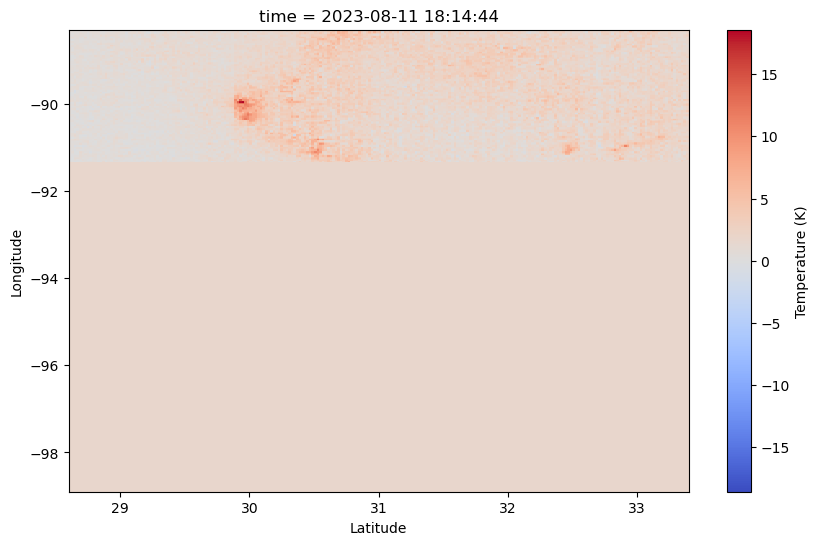

In [8]:
import matplotlib.pyplot as plt
# # Define your latitude and longitude bounds
# lat_min, lat_max = 28.6, 33.4  # Example latitude range
# lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 0 #Change this to select a different hour if desired
temperature_data = full_ds_nonull[f"{variable_name}_withinpaint"].isel(time=0)
# temperature_data = ds['Percent_Tree_Cover']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

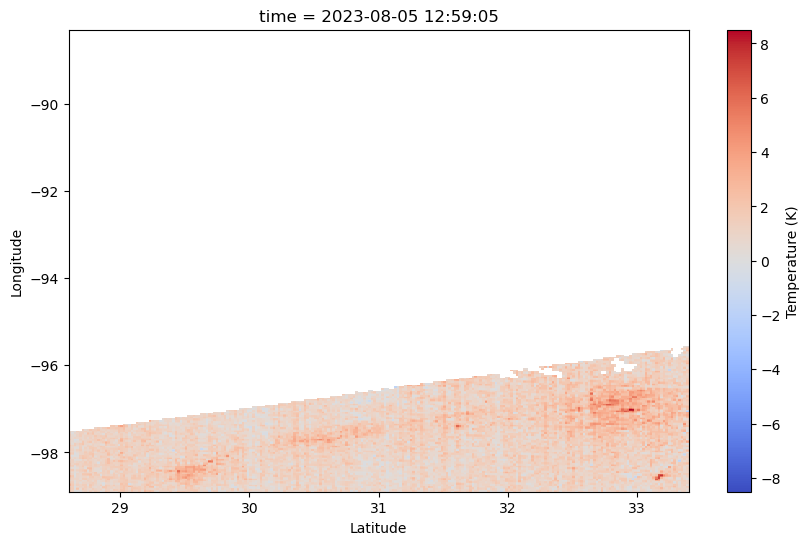

In [7]:
import matplotlib.pyplot as plt
# # Define your latitude and longitude bounds
# lat_min, lat_max = 28.6, 33.4  # Example latitude range
# lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 0 #Change this to select a different hour if desired
temperature_data = full_ds_nonull[f"{variable_name}_masked"].isel(time=0)
# temperature_data = ds['Percent_Tree_Cover']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()